In [1]:
# Core scverse libraries
import scanpy as sc
import anndata as ad
import warnings
warnings.filterwarnings('ignore')

# Data retrieval
# import pooch

# sc.settings.set_figure_params(dpi=50, facecolor="white")    

# EXAMPLE_DATA = pooch.create(
#     path=pooch.os_cache("scverse_tutorials"),
#     base_url="doi:10.6084/m9.figshare.22716739.v1/",
# )
# EXAMPLE_DATA.load_registry_from_doi()

In [2]:
import pandas as pd
import scanpy as sc
import numpy as np

def run_umap(data_path, n_neighbors=15, min_dist=0.1, n_components=2):
    # Load data
    df = pd.read_csv(data_path)
    
    # Convert 'N/A' to NaN and handle missing values
    df.replace("N/A", np.nan, inplace=True)
    df = df.astype(float)
    df.fillna(df.mean(), inplace=True)
    
    # Extract feature columns (excluding 'Global X' and 'Global Y')
    feature_cols = df.columns[2:]
    data = df[feature_cols]
    
    # Create AnnData object
    adata = sc.AnnData(data)
    
    # Normalize and scale
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.scale(adata)
    
    # Determine valid number of PCA components
    n_comps = min(adata.shape[0], adata.shape[1]) - 1  # Ensures it's strictly less
    
    # Run PCA
    sc.tl.pca(adata, n_comps=n_comps)
    
    # Compute neighbors with correct n_neighbors
    sc.pp.neighbors(adata, n_neighbors=n_neighbors)
    
    # Run UMAP
    sc.tl.umap(adata)
    
    return adata.obsm["X_umap"]

# Example usage:
# umap_results = run_umap("data.csv")
umap_results = run_umap("/Users/clark/Desktop/wang/protein_visualization_app/sample_data/cell_data.csv")

In [3]:
# Load data
df = pd.read_csv("/Users/clark/Desktop/wang/protein_visualization_app/sample_data/cell_data.csv")

# Convert 'N/A' to NaN and handle missing values
df.replace("N/A", np.nan, inplace=True)
df = df.astype(float)
df.fillna(df.mean(), inplace=True)

In [4]:
# Extract feature columns (excluding 'Global X' and 'Global Y')
feature_cols = df.columns[2:]
data = df[feature_cols]

data = data.loc[:, ~data.columns.str.contains('N/A')]
data

,CD45RO,CD31,pan-CK,PD-1,Ki-67,cyclin D,b-actin,CD3,CD4,CD16,PD-L1,ATPase,Granzyme B,P53,NF-kB,PTEN,p-ERK1/2,Caspase 3
0,468.84,572.88,364.78,434.52,493.69,360.27,385.10,568.56,418.84,335.92,375.50,418.70,300.28,381.46,381.28,425.15,376.43,431.84
1,446.30,478.44,439.88,490.33,489.11,364.10,478.50,498.00,458.62,446.78,435.28,483.22,448.58,402.06,400.58,396.18,338.16,353.90
2,597.96,492.00,523.58,474.24,493.73,424.08,528.58,692.66,436.78,542.00,480.94,490.96,482.99,487.26,490.28,552.08,522.63,499.95
3,204.70,211.20,210.60,209.45,212.58,211.79,192.30,211.80,207.50,212.08,204.08,201.58,200.26,208.60,218.37,212.98,190.80,212.10
4,394.57,431.94,400.24,378.68,420.69,369.39,439.10,513.36,415.01,363.10,425.62,459.24,464.58,419.18,419.76,420.68,288.04,324.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,389.10,402.16,488.21,460.45,564.92,455.76,492.68,365.58,479.66,388.86,376.88,418.98,447.16,374.46,498.18,546.00,467.98,495.16
6491,328.48,335.76,332.20,314.78,335.33,344.46,304.08,340.82,332.08,321.00,327.06,310.66,329.56,315.30,326.38,335.39,326.58,302.84
6492,278.80,359.66,295.70,255.30,249.29,273.74,240.72,364.74,257.18,238.56,240.30,245.74,322.90,232.16,304.48,269.48,271.38,292.58
6493,351.10,370.80,333.98,339.04,341.60,382.18,367.58,360.80,336.24,326.26,363.78,380.06,369.60,349.88,356.28,334.24,341.00,340.00


In [ ]:
import umap

reducer = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(data)

NameError: name 'plt' is not defined

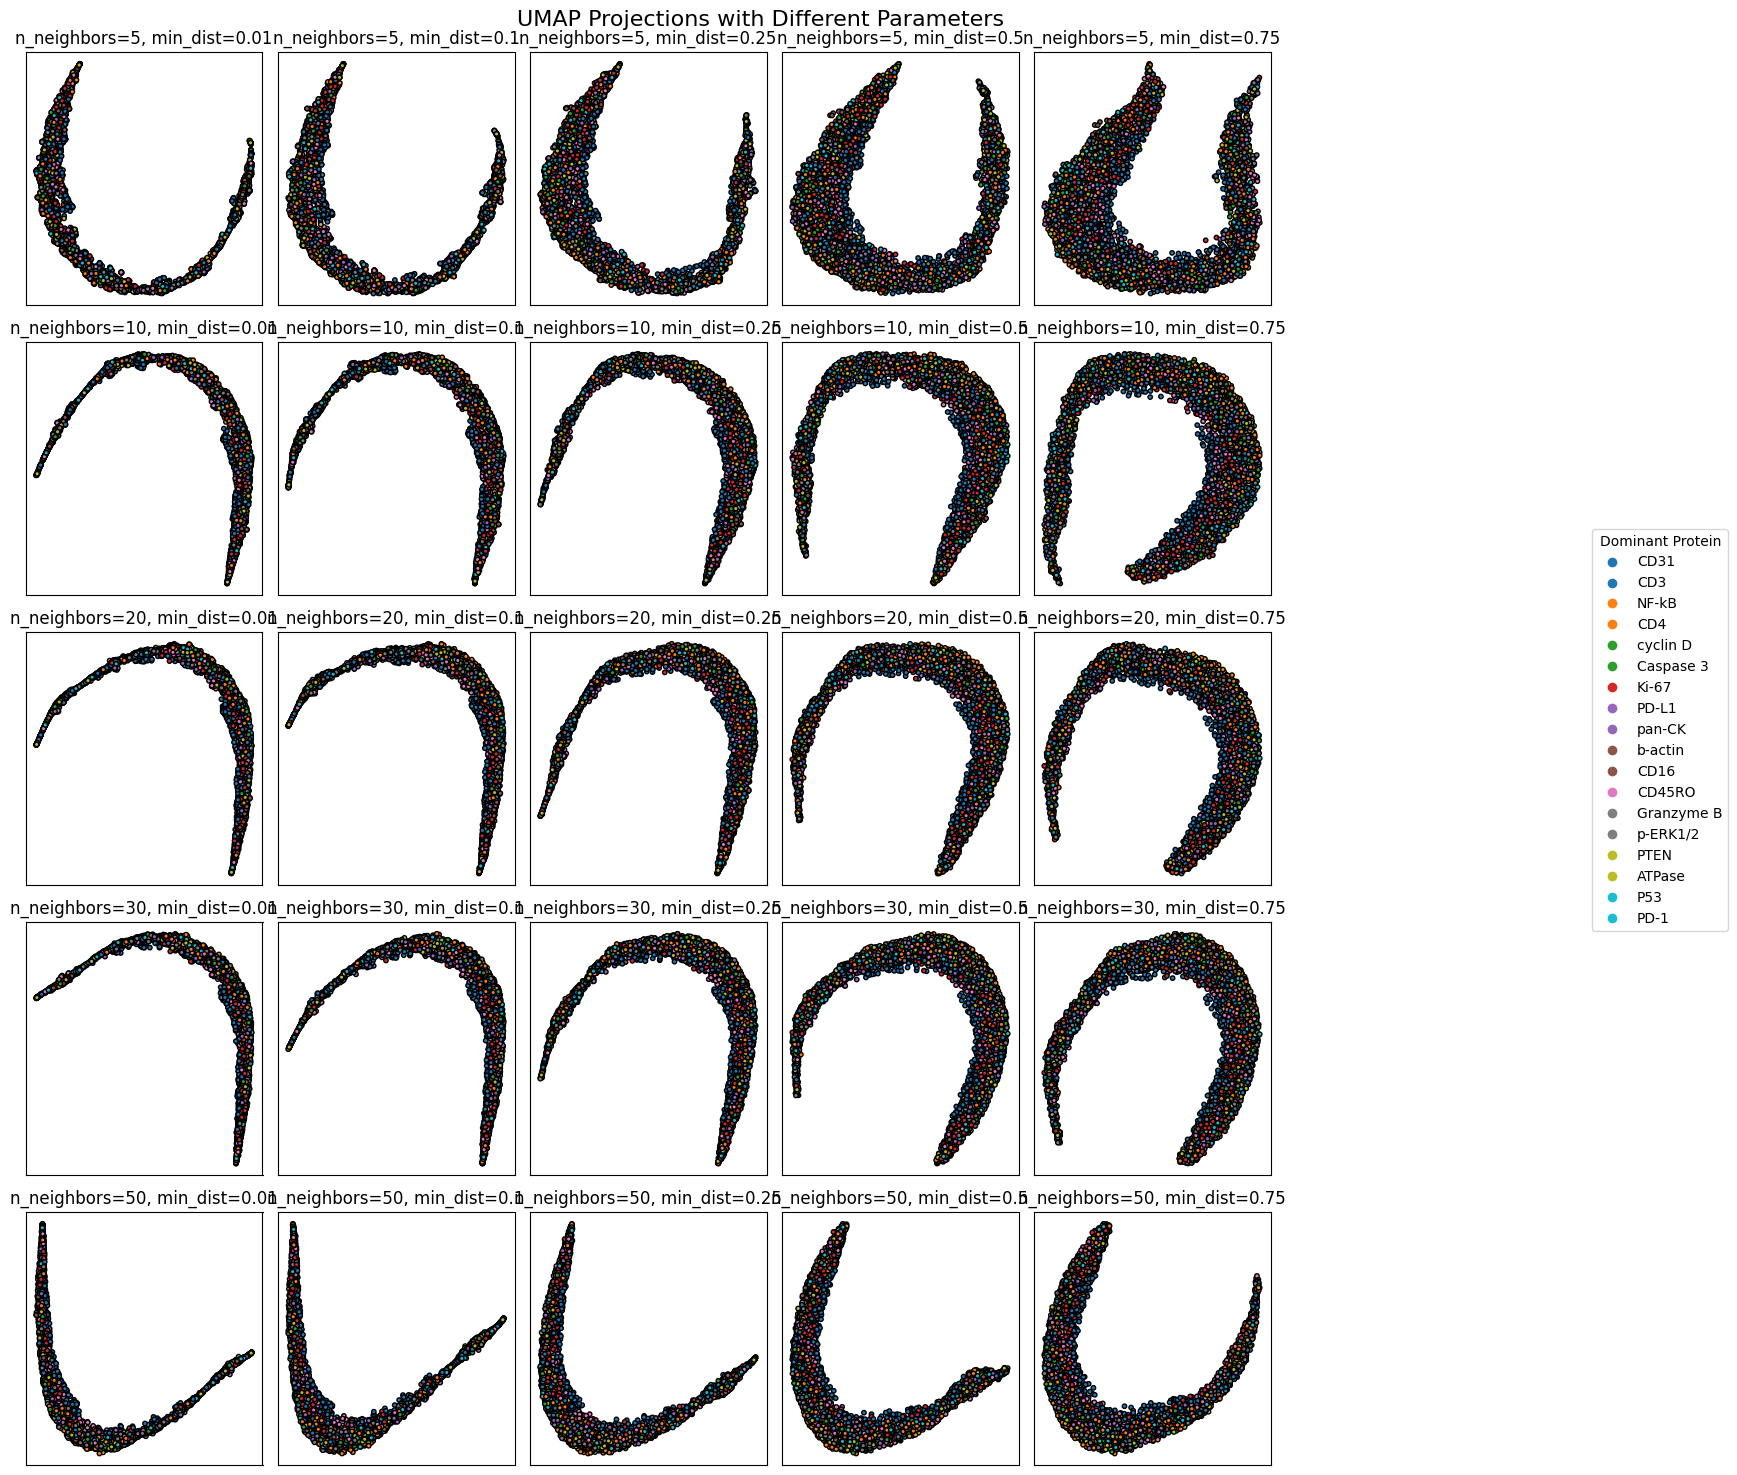

In [18]:
import umap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Determine dominant protein for each row
dominant_proteins = data.idxmax(axis=1)
unique_proteins = dominant_proteins.unique()
color_map = {protein: i for i, protein in enumerate(unique_proteins)}
colors = dominant_proteins.map(color_map)

# Define parameter ranges
n_neighbors_values = [5, 10, 20, 30, 50]
min_dist_values = [0.01, 0.1, 0.25, 0.5, 0.75]

fig, axes = plt.subplots(5, 5, figsize=(15, 15))
fig.suptitle("UMAP Projections with Different Parameters", fontsize=16)

# Generate UMAP projections
for i, n_neighbors in enumerate(n_neighbors_values):
    for j, min_dist in enumerate(min_dist_values):
        ax = axes[i, j]
        
        reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=42)
        embedding = reducer.fit_transform(data)
        
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=colors, cmap="tab10", edgecolor="k", s=10)
        ax.set_title(f"n_neighbors={n_neighbors}, min_dist={min_dist}")
        ax.set_xticks([])
        ax.set_yticks([])

# Add legend to the side
handles = [plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=scatter.cmap(scatter.norm(color_map[p])), markersize=8) for p in unique_proteins]
fig.legend(handles, unique_proteins, title="Dominant Protein", bbox_to_anchor=(1.05, 0.5), loc="center left")

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit the legend
plt.show()

In [10]:
data

array([[17.330908 ,  5.629675 ],
       [17.560797 ,  5.0148683],
       [16.899982 ,  3.2062507],
       ...,
       [10.663066 , 11.868839 ],
       [18.5762   ,  8.640904 ],
       [18.696339 ,  6.718416 ]], dtype=float32)

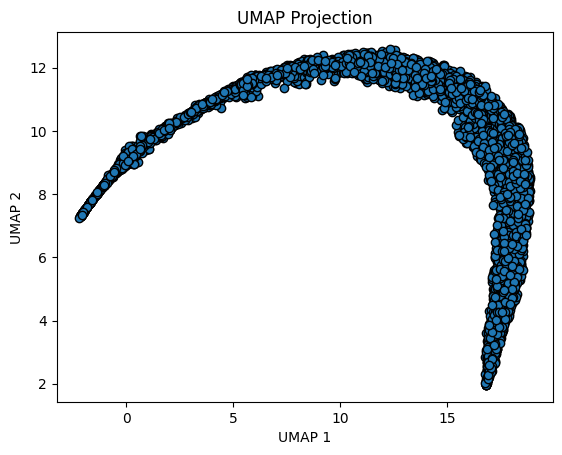

In [ ]:
import umap

reducer = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(data)
plt.scatter(embedding[:, 0], embedding[:, 1], cmap="viridis", edgecolor="k")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("UMAP Projection")
plt.show()

In [15]:
adata = sc.AnnData(data)

# Normalize and scale
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
# sc.pp.scale(adata)


In [23]:


# Determine valid number of PCA components  
n_comps = min(adata.shape[0], adata.shape[1]) - 1  # Ensures it's strictly less

print(n_comps)
# Run PCA
sc.tl.pca(adata, n_comps=n_comps)

# sc.pl.pca_variance_ratio(adata, n_pcs=20, log=True)

17


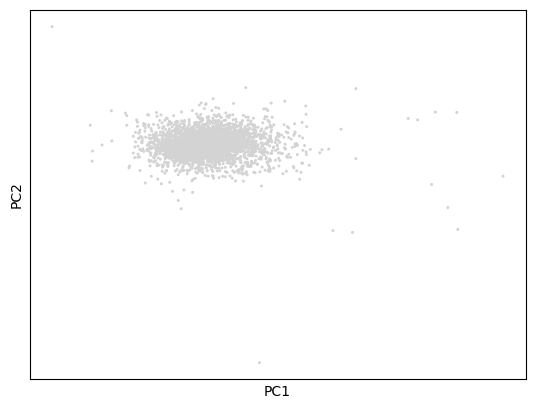

In [26]:
sc.pl.pca(
    adata,
    # color=["sample", "sample", "pct_counts_mt", "pct_counts_mt"],
    # dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
 
)

In [22]:

# Compute neighbors with correct n_neighbors
sc.pp.neighbors(adata)


sc.tl.umap(adata)

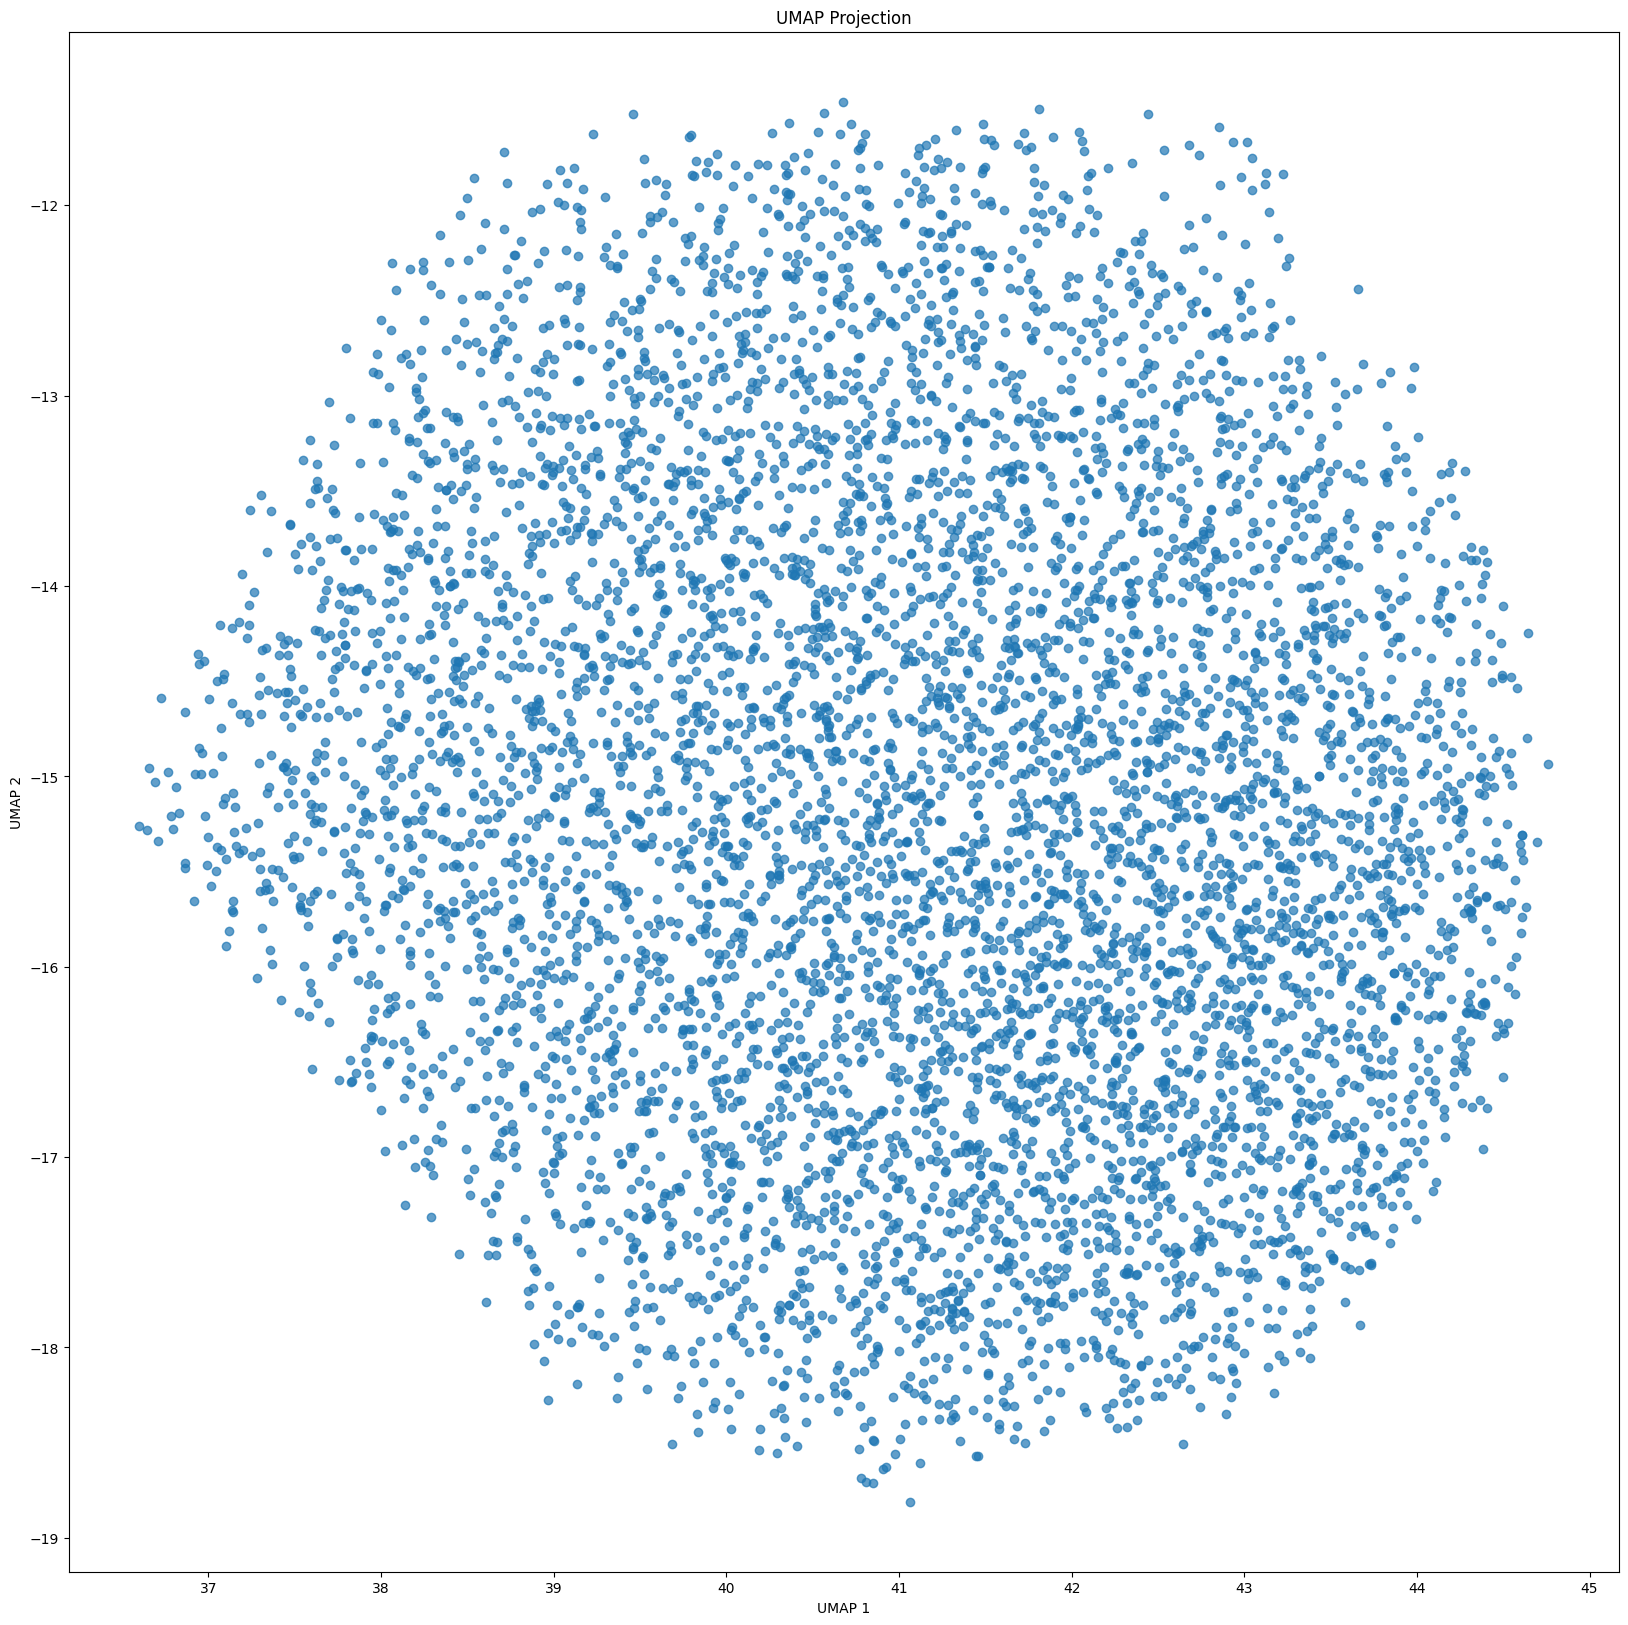

In [6]:
import matplotlib.pyplot as plt

def plot_umap(umap_results):

    plt.figure(figsize=(20, 20))
    plt.scatter(umap_results[:, 0], umap_results[:, 1], alpha=0.7)
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.title("UMAP Projection")
    plt.show()

# Example usage:
# umap_results = run_umap("data.csv")
plot_umap(umap_results)


In [ ]:
umap_results